In [1]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [2]:
# Fractal Dream Attractor
@jit(nopython=True)
def Attractor_Calc(x0, y0, n, a, b, c, d):
    
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):

        x[i+1] = np.sin(b * y[i]) + c * np.sin(b * x[i])
        y[i+1] = np.sin(a * x[i]) + d * np.sin(a * y[i])
    
    return x, y

In [3]:
def Attractor_Plot(n=10000000, a=-2.83, b= 1.37, c=1.96, d=0.60, cmap=["yellow", "green"]):

    x0, y0 =0.1, 0.1
    cvs = ds.Canvas(plot_width=700, plot_height=700)
    
    x, y = Attractor_Calc(x0, y0, n, a, b, c, d)
    agg = cvs.points(pd.DataFrame({"x":x, "y":y}), "x", "y")
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=10000000, name='n', start=1, value=10000000)
        [1] FloatSlider(end=2.83, name='a', start=-8.49, value=-2.83)
        [2] FloatSlider(end=4.11, name='b', start=-1.37, value=1.37)
        [3] FloatSlider(end=5.88, name='c', start=-1.96, value=1.96)
        [4] FloatSlider(end=1.7999999999999998, name='d', start=-0.6, value=0.6)
    [1] Row
        [0] PNG(Image, name='interactive00006')
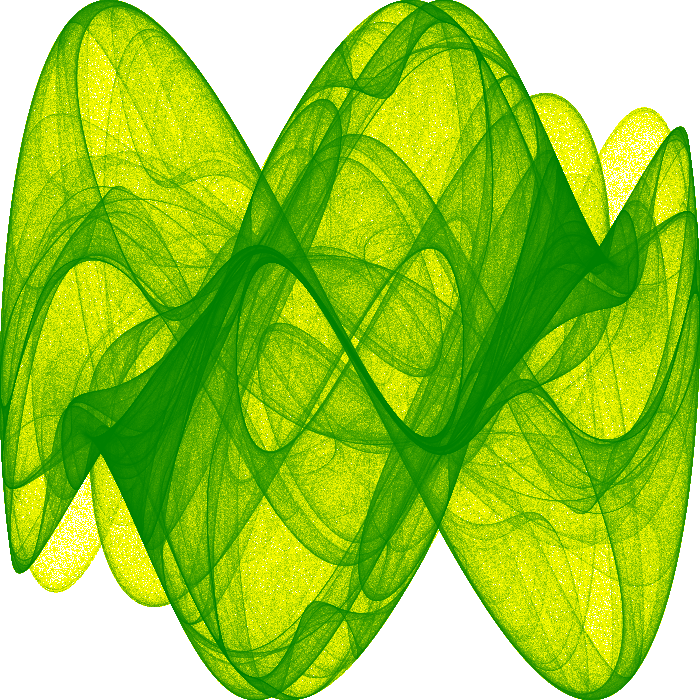

In [4]:
pn.extension()
pn.interact(Attractor_Plot, n=(1, 10000000))